In [1]:
import pickle
from typing import List
from ext.jjnp21.automator.analyzer import BasicResultAnalyzer
from ext.jjnp21.automator.experiment import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

base_path = '/home/jp/Documents/tmp/1000s75rq/'
city_dump_path = '/home/jp/Documents/tmp/1000s75rq/city/city.dump'
nation_dump_path = '/home/jp/Documents/tmp/1000s75rq/nation/nation.dump'
global_dump_path = '/home/jp/Documents/tmp/1000s75rq/global/global.dump'

# This is just here to have a central location to get the strings identifying the results
rrc = 'Round Robin centralized'
rrd = 'Round Robin on all nodes'
lrtc = 'Least Response Time centralized'
lrtd = 'Least Response Time on all nodes'
lb_types = [rrc, rrd, lrtc, lrtd]

def load_results(path) -> List[Result]:
    with open(path, 'rb') as f:
        results = pickle.load(f)
        return results
        
def get_compiled_results():
    results = {}
    for key in ['city', 'nation', 'global']:
        results[key] = {}
        rs = load_results(f'{base_path}{key}/{key}.dump')
        for r in rs:
            results[key][r.experiment.name] = r
    return results
    
r = get_compiled_results() 
r

{'city': {'Least Response Time on all nodes': Result(experiment=Experiment(name='Least Response Time on all nodes', topology_factory=<ext.jjnp21.automator.factories.topology.RaithHeterogeneousUrbanSensingFactory object at 0x7fae28580a50>, benchmark_factory=<ext.jjnp21.automator.factories.benchmark.ConstantBenchmarkFactory object at 0x7fadd1fd2890>, faas_factory=<ext.jjnp21.automator.factories.faas.LocalizedLoadBalancerFaaSFactory object at 0x7fadd1c516d0>, lb_type=<LoadBalancerType.LEAST_RESPONSE_TIME: 2>, lb_placement_strategy=<LoadBalancerPlacementStrategy.ALL_NODES: 2>, client_lb_resolving_strategy=<ClientLoadBalancerResolvingStrategy.LOWEST_PING: 1>, client_placement_strategy=<ClientPlacementStrategy.NONE: 1>, function_scheduler_factory=<ext.jjnp21.automator.factories.function_scheduler.DefaultFunctionSchedulerFactory object at 0x7fadd33fc590>, function_scaling_strategy=<FunctionScalingStrategy.CUSTOM_STATIC: 1>, friendly_name='-', net_mode=<NetworkSimulationMode.ACCURATE: 2>, seed

In [2]:
def e2e_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].invocations['t_exec'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)

def network_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].invocations['tx_time_cl_lb'] + results[key].invocations['tx_time_lb_fx'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)
    
def fet_histogram(subplot, results, title):
    data = []
    for key in [rrc, rrd, lrtc, lrtd]:
        data.append(results[key].fets['t_fet'])
    subplot.set_title(title)
    subplot.tick_params(labelrotation=30, axis='x')
    subplot.boxplot(data, labels=['RR-central', 'RR-dist', 'LRT-central', 'LRT-dist'], notch=True, whis=10)
    

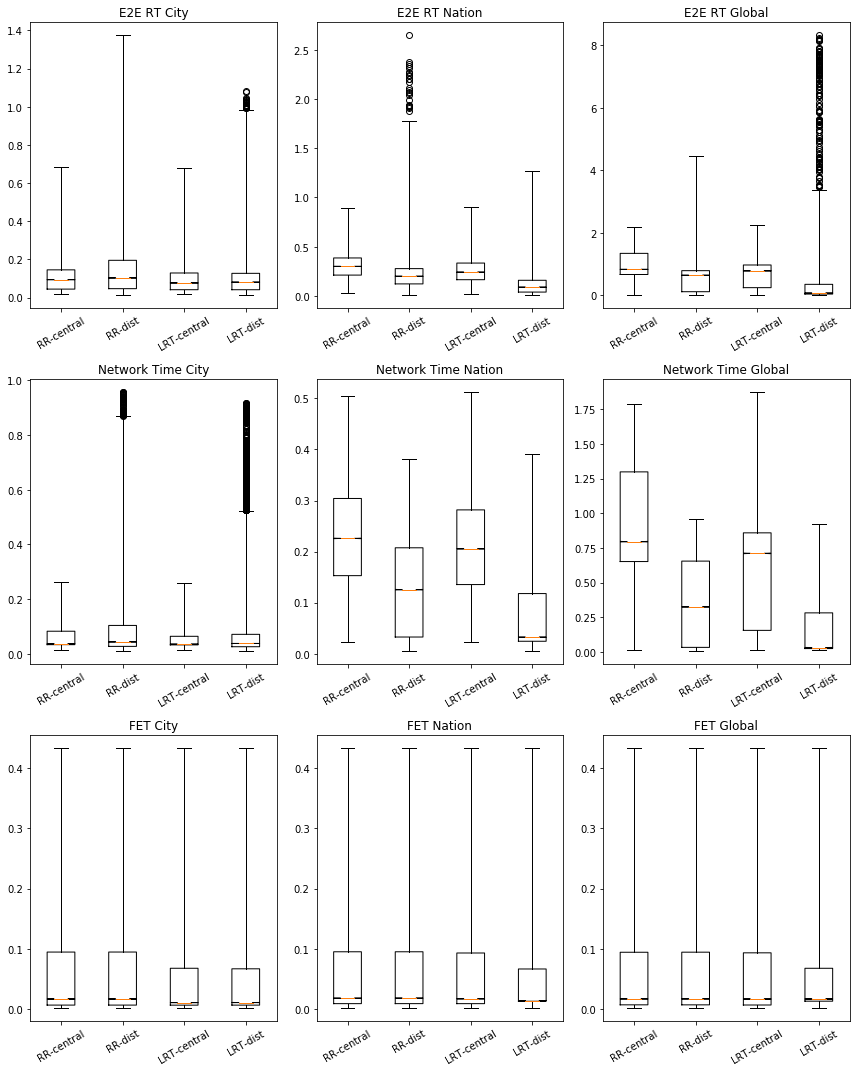

In [3]:
fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(12)
e2e_histogram(axs[0, 0], r['city'], 'E2E RT City')
e2e_histogram(axs[0, 1], r['nation'], 'E2E RT Nation')
e2e_histogram(axs[0, 2], r['global'], 'E2E RT Global')

network_histogram(axs[1, 0], r['city'], 'Network Time City')
network_histogram(axs[1, 1], r['nation'], 'Network Time Nation')
network_histogram(axs[1, 2], r['global'], 'Network Time Global')

fet_histogram(axs[2, 0], r['city'], 'FET City')
fet_histogram(axs[2, 1], r['nation'], 'FET Nation')
fet_histogram(axs[2, 2], r['global'], 'FET Global')

fig.tight_layout()
plt.show()

In [4]:
import seaborn as sns
nd = {}
data = []
for k in [lrtc, rrd]:
#     nd[k] = r['nation'][k].invocations['t_exec']
    nd[k] = r['nation'][k].fets['t_fet']
    
# invs = r['global'][k].fets['t_fet']
# print(nd[lrtc].index.drop_duplicates())
df = pd.concat(list(nd.values()), axis=1, keys=list(nd.keys()))
print(df)
# df = pd.DataFrame(nd)
sns.displot(data=df, kind='kde', label=k, fill=True)
    
    
plt.legend(prop={'size': 16})
plt.xlabel('Response Time')
plt.xlim(0, 0.5)
plt.ylabel('Probability Density')
plt.show()


ValueError: cannot reindex from a duplicate axis

/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/jp/Documents/GitProjects/faas-sim/.venv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

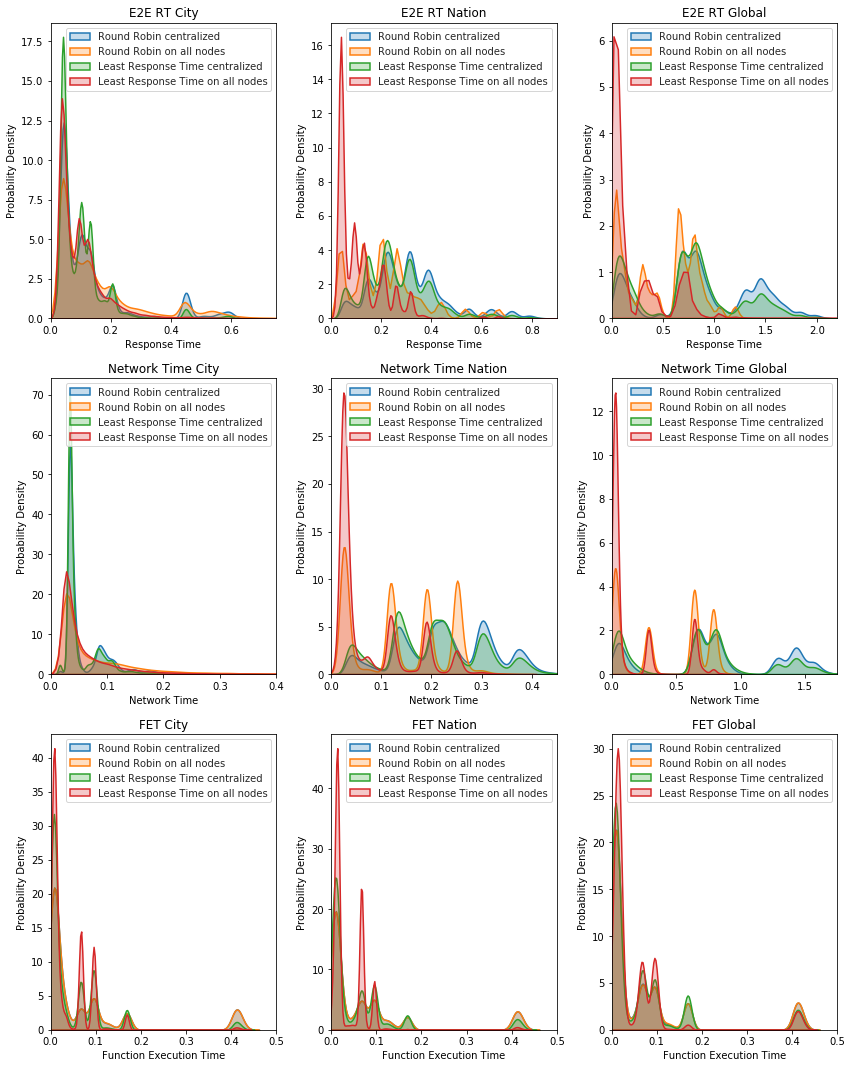

In [5]:
fig, axs = plt.subplots(3,3)
fig.set_figheight(15)
fig.set_figwidth(12)

sns.set_theme(style='white')
# sns.set_theme(palette='tab10')
# sns.set_palette('bright')
# colors = sns.color_palette(palette='colorblind')
# cmap = {}
# for i in range(len(lb_types)):
#     cmap[lb_types[i]] = colors[i]
    
# print(cmap)

def distplot_e2e(axis, data, title, limits):
    for k in lb_types:
        invs = data[k].invocations['t_exec']
        sns.distplot(invs, hist=False, kde=True, kde_kws={'linewidth':1.5, 'shade': True}, label=k, ax=axis)
    axis.legend(prop={'size': 10})
    axis.set_xlabel('Response Time')
    axis.set_ylabel('Probability Density')
    axis.set_title(title)
    axis.set_xlim(limits)
    
def distplot_net(axis, data, title, limits):
    for k in lb_types:
        invs = data[k].invocations['tx_time_cl_lb'] + data[k].invocations['tx_time_lb_fx']
        sns.distplot(invs, hist=False, kde=True, kde_kws={'linewidth':1.5, 'shade': True}, label=k, ax=axis)
    axis.legend(prop={'size': 10})
    axis.set_xlabel('Network Time')
    axis.set_ylabel('Probability Density')
    axis.set_title(title)
    axis.set_xlim(limits)
    
def distplot_fet(axis, data, title, limits):
    for k in lb_types:
        invs = data[k].fets['t_fet']
        sns.distplot(invs, hist=False, kde=True, kde_kws={'linewidth':1.5, 'shade': True}, label=k, ax=axis)
    axis.legend(prop={'size': 10})
    axis.set_xlabel('Function Execution Time')
    axis.set_ylabel('Probability Density')
    axis.set_title(title)
    axis.set_xlim(limits)
    
# note that the values for the limits are found by first plotting without any and then setting them manually

distplot_e2e(axs[0, 0], r['city'], 'E2E RT City', [0, 0.75])
distplot_e2e(axs[0, 1], r['nation'], 'E2E RT Nation', [0, 0.9])
distplot_e2e(axs[0, 2], r['global'], 'E2E RT Global', [0, 2.2])

distplot_net(axs[1, 0], r['city'], 'Network Time City', [0, 0.4])
distplot_net(axs[1, 1], r['nation'], 'Network Time Nation', [0, 0.45])
distplot_net(axs[1, 2], r['global'], 'Network Time Global', [0, 1.75])

distplot_fet(axs[2, 0], r['city'], 'FET City', [0, 0.5])
distplot_fet(axs[2, 1], r['nation'], 'FET Nation', [0, 0.5])
distplot_fet(axs[2, 2], r['global'], 'FET Global', [0, 0.5])

fig.tight_layout()
plt.show()